In [46]:
import pandas as pd
import os
import random

def merge_csv_files(directory):
    # List all files in the directory
    files = os.listdir(directory)

    # Filter out the files that are not CSV
    csv_files = [f for f in files if f.endswith('.csv')]

    # Initialize an empty list to hold dataframes
    df_list = []

    # Loop through all csv files and append into the dataframe list
    for csv_file in csv_files:
        df = pd.read_csv(os.path.join(directory, csv_file))
        df_list.append(df)

    # Concatenate all dataframes in the list
    merged_df = pd.concat(df_list, ignore_index=True)

    return merged_df


## Cleaning

In [79]:
# Merge CSV files of users and ramp experiments
users_df = merge_csv_files("numb_users")
ramp_df = merge_csv_files("ramp_period") 

In [80]:
# We remove the total rows and we add a column for number of users : #Sample/5
users_df = users_df[users_df["Label"] != "TOTAL"]
users_df["n_users"] = users_df["# Samples"]//5
users_df["std"] = (users_df["Max"] - users_df["Min"])/4
users_df["Throughput"] = users_df["Throughput"].str.replace(',', '.').astype(float)
# We remove the total rows and we add a column for the ramp duration (1s, 5s, 10s)
ramp_df = ramp_df[ramp_df["Label"] != "TOTAL"]
ramp_df["duration"] = [10,1,5]
ramp_df["Throughput"] = ramp_df["Throughput"].str.replace(',', '.').astype(float)


In [73]:
users_df.head()

,Label,# Samples,Average,Median,90% Line,95% Line,99% Line,Min,Max,Error %,Throughput,Received KB/sec,Sent KB/sec,n_users,std
0,Homepage,500,40,39,45,49,58,36,62,"0,000%",96.63703,"18,69","10,38",100,6.50
2,Homepage,5000,65,60,93,115,140,36,389,"0,000%",923.53158,"178,57","99,21",1000,88.25
4,Homepage,50000,557,212,2176,2627,3465,37,7622,"0,000%",1213.03282,"234,55","130,31",10000,1896.25
6,Homepage,1250,42,40,49,59,75,36,92,"0,000%",240.24601,"46,45","25,81",250,14.00
8,Homepage,12500,163,136,312,408,495,38,655,"0,000%",1399.61930,"270,63","150,35",2500,154.25


In [19]:
ramp_df.head()

,Label,# Samples,Average,Median,90% Line,95% Line,99% Line,Min,Max,Error %,Throughput,Received KB/sec,Sent KB/sec,duration
0,Homepage,25000,320,179,935,1260,1718,36,3926,"0,000%","1237,43998","239,27","132,93",10
2,Homepage,50000,1863,1995,4218,6352,9081,38,11530,"50,000%","111,46955","162,80","5,99",1
4,Homepage,25000,666,224,2001,2158,2483,37,3503,"0,000%","1031,48079","199,45","110,80",5


## Visualisation

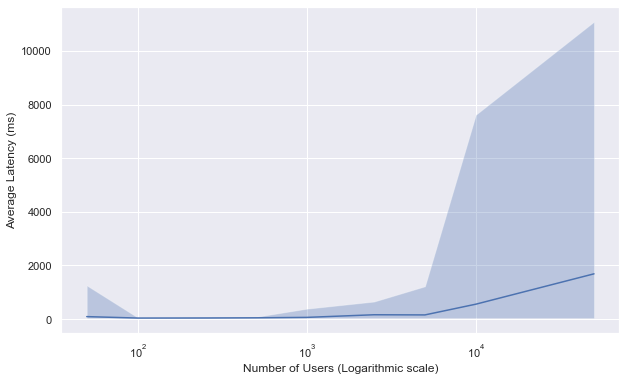

<Figure size 432x288 with 0 Axes>

In [74]:

# Assuming users_df is a pandas DataFrame with columns 'average' and 'n_users'
# Add a line for the throughput column in the same graph

tmp = users_df.sort_values(by=['n_users'])
average = tmp['Average']
n_users = tmp['n_users']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tmp,x="n_users", y="Average", markers=True)  # 95% confidence interval
ax.fill_between(n_users, y1=tmp["Min"], y2=tmp["Max"], alpha=.3)
plt.xlabel('Number of Users (Logarithmic scale)')
plt.ylabel('Average Latency (ms)')
plt.xscale('log')
plt.grid(True)
plt.show()
plt.savefig("average_latency.png")

# tmp = users_df.sort_values(by=['n_users'])
# average = tmp['Average']
# n_users = tmp['n_users']
# throughput = tmp['Throughput']

# plt.figure(figsize=(10,6))
# plt.plot(n_users, average, marker='o')
# plt.title('Average vs Number of Users')
# plt.xlabel('Number of Users (Logarithmic scale)')
# plt.ylabel('Average')
# plt.xscale('log')
# plt.grid(True)
# plt.show()

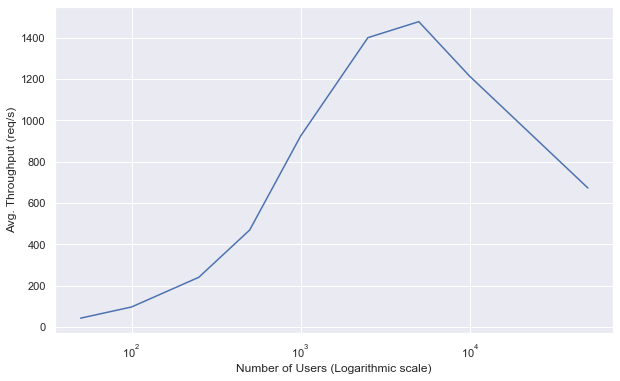

<Figure size 432x288 with 0 Axes>

In [76]:
# Avg Throughput vs Number of Users
tmp = users_df.sort_values(by=['n_users'])
rho = tmp['Throughput']
n_users = tmp['n_users']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=tmp,x="n_users", y="Throughput", markers=True)  # 95% confidence interval
#ax.fill_between(n_users, y1=tmp["Min"], y2=tmp["Max"], alpha=.3)
plt.xlabel('Number of Users (Logarithmic scale)')
plt.ylabel('Avg. Throughput (req/s)')
plt.xscale('log')
plt.grid(True)
plt.show()
plt.savefig("average_throughput.png")

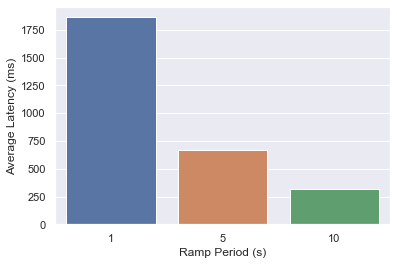

<Figure size 432x288 with 0 Axes>

In [81]:
# Average latency with Ramp Period

sns.barplot(data=ramp_df,x="duration", y="Average")
plt.xlabel('Ramp Period (s)')
plt.ylabel('Average Latency (ms)')
plt.show()
plt.savefig("latency_ramp.png")

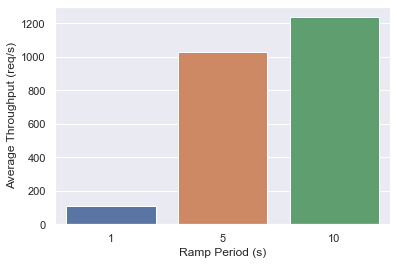

<Figure size 432x288 with 0 Axes>

In [82]:
# Average thr with Ramp Period

sns.barplot(data=ramp_df,x="duration", y="Throughput")
plt.xlabel('Ramp Period (s)')
plt.ylabel('Average Throughput (req/s)')
plt.show()
plt.savefig("thr_ramp.png")